In [1]:
import scipy.io
import netCDF4
import xarray as xr
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import os, glob 
import imageio
from matplotlib import animation
import copy
import cartopy as cart
import cartopy.crs as ccrs
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter #see https://scitools.org.uk/cartopy/docs/v0.15/examples/tick_labels.html
import certifi
import ssl
import math
ssl._create_default_https_context = ssl._create_unverified_context
from scipy import stats
from xgcm import Grid
import statsmodels.api as sm
import matplotlib.ticker as ticker
from matplotlib.axes._secondary_axes import SecondaryAxis
import xesmf as xe

In [2]:
#amplification per degree C

zika_mean=3.6
cheng_mean=2.6
durack_mean=8
skliris2016_mean=3.0
us_mean=4.581

skliris2016_std=1.6
cheng_std=4.4
zika_std=2.1
durack_std=5
us_std=1.194




mean=[durack_mean,skliris2016_mean,zika_mean,cheng_mean,us_mean]
std=[durack_std,skliris2016_std,zika_std,cheng_std,us_std]

#skliris over period 1950 to 2010
#zika 1957 to 2016
#durack 1950 to 2000
#cheng 1960 to 2005

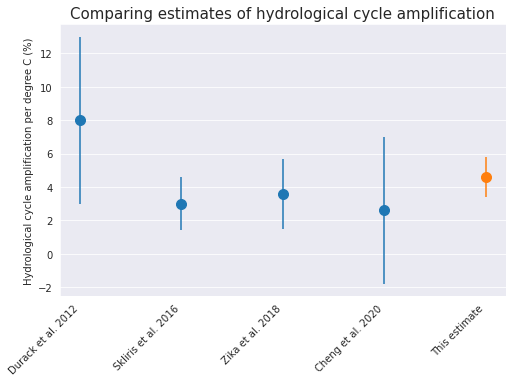

In [3]:
import seaborn as sns
sns.set_style(style="darkgrid")
fig,ax=plt.subplots(figsize=(8,5))
sns.set(font_scale = 1)
plt.errorbar(np.linspace(1,4,4), mean[0:4],yerr=std[0:4],fmt ='o',
        ms=10)
plt.errorbar(5, mean[4],yerr=std[4],fmt ='o',
        ms=10)
#plt.scatter(5,)
ax.xaxis.grid()
xticks=['Durack et al. 2012','Skliris et al. 2016','Zika et al. 2018','Cheng et al. 2020','This estimate']
plt.xticks(np.linspace(1,5,5),xticks)
ax.set_xticklabels(xticks, rotation = 45, ha="right")
ax.set_ylabel('Hydrological cycle amplification per degree C (%)')
plt.title('Comparing estimates of hydrological cycle amplification',fontsize=15)


mpl.pyplot.savefig('fig4.png', dpi=1000,bbox_inches='tight')

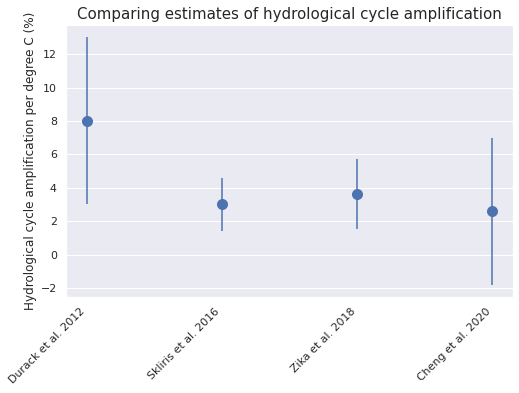

In [7]:
import seaborn as sns
sns.set_style(style="darkgrid")
fig,ax=plt.subplots(figsize=(8,5))
sns.set(font_scale = 1)
plt.errorbar(np.linspace(1,4,4), mean[0:4],yerr=std[0:4],fmt ='o',
        ms=10)
#plt.scatter(5,)
ax.xaxis.grid()
xticks=['Durack et al. 2012','Skliris et al. 2016','Zika et al. 2018','Cheng et al. 2020']
plt.xticks(np.linspace(1,4,4),xticks)
ax.set_xticklabels(xticks, rotation = 45, ha="right")
ax.set_ylabel('Hydrological cycle amplification per degree C (%)')
plt.title('Comparing estimates of hydrological cycle amplification',fontsize=15)


mpl.pyplot.savefig('fig4_withoutours.png', dpi=500,bbox_inches='tight')